In [97]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load statistic package
from scipy import stats
import math
from pylab import * # untuk melihat hasil korelasi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [61]:
data = pd.read_excel('data_perokok_tb.xlsx')

In [62]:
data

,kota,penduduk,perokok,tb
0,KEPULAUAN SERIBU,29230,4094.8150,29
1,JAKARTA BARAT,2569462,387218.7425,4462
2,JAKARTA PUSAT,1153399,165788.9851,6670
3,JAKARTA SELATAN,2367002,345932.2550,4207
4,JAKARTA TIMUR,3234003,474220.0932,4126
5,JAKARTA UTARA,1843537,273636.4059,2662


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kota      6 non-null      object 
 1   penduduk  6 non-null      int64  
 2   perokok   6 non-null      float64
 3   tb        6 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 320.0+ bytes


In [64]:
data['perokok'] = [math.ceil(i) for i in data['perokok']]

In [65]:
data['perokok'] = data['perokok'].apply(np.int64)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   kota      6 non-null      object
 1   penduduk  6 non-null      int64 
 2   perokok   6 non-null      int64 
 3   tb        6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


In [67]:
# check data correlation

data.corr()

,penduduk,perokok,tb
penduduk,1.000000,0.999631,0.478306
perokok,0.999631,1.000000,0.470652
tb,0.478306,0.470652,1.000000


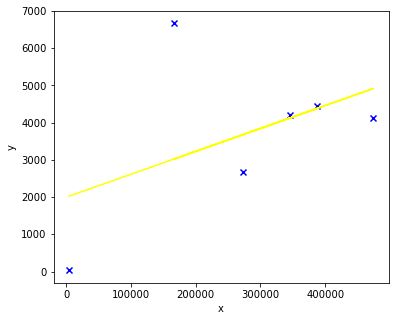

In [98]:
# membuat garis korelasi
(m, b) = polyfit(data['perokok'], data['tb'], 1)
yp = np.polyval([m, b], data['perokok'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

# scatter plot
ax.scatter(data['perokok'], data['tb'], marker="x", color="blue")

# plot korelasi
ax.plot(data['perokok'], yp, color="yellow")

ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

In [99]:
x = data['perokok'].values.reshape(-1,1)
y = data['tb'].values.reshape(-1,1)

# menentukan persamaan regresi
reg = LinearRegression()
reg.fit(x, y)

print("Y = {:.5} + {:.5} X".format(reg.intercept_[0], reg.coef_[0][0]))

print()

# melihat relevansi antar variabel
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Y = 1999.1 + 0.006155 X



C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.138
Date:                Wed, 05 Apr 2023   Prob (F-statistic):              0.346
Time:                        14:19:30   Log-Likelihood:                -53.417
No. Observations:                   6   AIC:                             110.8
Df Residuals:                       4   BIC:                             110.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1999.1251   1819.656      1.099      0.3

In [68]:
probas = [i/sum(data.	penduduk) for i in data.	penduduk]
probas

[0.0026106062420729517,
 0.22948523899997436,
 0.10301302186112557,
 0.21140301731779546,
 0.2888370995101831,
 0.16465101606884855]

In [69]:
first_sample = np.random.choice(data.kota,4, p=probas, replace=False)

In [70]:
first_data = data[data['kota'].isin(first_sample)]
first_data

,kota,penduduk,perokok,tb
1,JAKARTA BARAT,2569462,387219,4462
3,JAKARTA SELATAN,2367002,345933,4207
4,JAKARTA TIMUR,3234003,474221,4126
5,JAKARTA UTARA,1843537,273637,2662


In [71]:
# Total number of city
N = 6
# Total number of sampled lakes
n = 4       # total number of sampled lakes
v = 4       # unique number of sampled lakes

# Selected index
x_index_full = [0, 1, 2, 3]
x_index_unique = [0, 1, 2, 3]

# pop sizes
pop_list = first_data.penduduk

# Total size of population
pop_tot = sum(data.penduduk)

# Pollutant concentrations
x_list = data.perokok


In [72]:
# calculate probability of selection of unit-i
p_list = [pop_i/pop_tot for pop_i in pop_list]

p_list

[0.22948523899997436,
 0.21140301731779546,
 0.2888370995101831,
 0.16465101606884855]

## **Estimate total and mean of the population**

---

- Using the **Horvitz-Thompson** estimator, we need to calculate the probability of choosing unit-$i$ to the sample, $p_{i}$ and the probability of inclusion, $\pi_{i}$ first

$$
\pi_{i} = 1 - (1 - p_{i})^{n}
$$
$$
p_{i} = \cfrac{\text{size}_{i}}{\text{size}_{\text{tot}}}


In [73]:
# calculate probability of selection of unit-i
p_list = [pop_i/pop_tot for pop_i in pop_list]

p_list

[0.22948523899997436,
 0.21140301731779546,
 0.2888370995101831,
 0.16465101606884855]

In [74]:
# calculate the probability of inclusions
pi_list = []
for i in range(v):
    p_i = p_list[i]

    pi_i = 1 - np.power(1-p_i, n)
    pi_list.append(pi_i)

print("The inclusion probability of region")
for i in range(v):
    print(f"  - reg. {i+1}: {pi_list[i]:.4f}")

The inclusion probability of region
  - reg. 1: 0.6475
  - reg. 2: 0.6133
  - reg. 3: 0.7442
  - reg. 4: 0.5131


- Next, we can calculate the total estimator 

$$
\hat{\tau}_{p} = \sum_{i=1}^{\nu} \cfrac{y_{i}}{\pi_{i}}
$$

In [75]:
# calculate total smoker
tau_hat_pi = 0
for i in range(v):
    x_i = x_list[x_index_unique[i]]
    pi_i = pi_list[x_index_unique[i]]
    
    tau_hat_pi += x_i/pi_i

print(f"Estimate total number of smoker  : {tau_hat_pi:.2f} smokers")

Estimate total number of smoker  : 1534755.72 smokers


- For the mean estimate, we can use

$$
\hat{\mu}_{\pi} = \cfrac{1}{N} \hat{\tau}_{\pi}
$$


In [76]:
# calculate mean smoker in each city
mu_hat_pi = (1/N) * tau_hat_pi

print(f"Estimate average smokers : {mu_hat_pi:.2f} smokers")

Estimate average smokers : 255792.62 smokers


## **Estimate the bound on error of the estimations**

---

- To calculate the bound on error on **the Hurvitz-Thompson**, we need to calculate the variance of total estimate first.

$$
\widehat{\text{var}}(\hat{\tau}_\pi)=\sum\limits_{i=1}^v \left( \dfrac{1-\pi_i}{\pi^2_i} \right) y^2_i + \sum\limits_{i=1}^v \sum\limits_{j\neq i} \left( \dfrac{\pi_{ij}-\pi_i \pi_j}{\pi_i \pi_j}\right)\dfrac{1}{\pi_{ij}} y_i y_j
$$

- with

$$
\pi_{ij} = \pi_{i}+\pi_{j} - 
[1 - (1 - p_{i} - p_{j})^{n}]
$$

In [77]:
# calculate the joint probability of inclusion (pi_ij)
pi_joint_list = []
for i in range(v):
    p_i = p_list[i]
    pi_i = pi_list[i]

    pi_joint_list_i = []
    for j in range(v):
        p_j = p_list[j]
        pi_j = pi_list[j]

        pi_ij = pi_i + pi_j - (1 - (1 - p_i - p_j)**(n))
        pi_joint_list_i.append(pi_ij)
    pi_joint_list.append(pi_joint_list_i)


print(f"All the joint inclusion probability of each unit")
pd.DataFrame(pi_joint_list)

All the joint inclusion probability of each unit


,0,1,2,3
0,0.380738,0.358510,0.445573,0.295334
1,0.358510,0.337508,0.419853,0.277884
2,0.445573,0.419853,0.520240,0.346485
3,0.295334,0.277884,0.346485,0.228480


- Finally we can calculate the variance

$$
\widehat{\text{var}}(\hat{\tau}_\pi)=\sum\limits_{i=1}^v \left( \dfrac{1-\pi_i}{\pi^2_i} \right) y^2_i + \sum\limits_{i=1}^v \sum\limits_{j\neq i} \left( \dfrac{\pi_{ij}-\pi_i \pi_j}{\pi_i \pi_j}\right)\dfrac{1}{\pi_{ij}} y_i y_j
$$

In [78]:
# calculate the first_term
first_term = 0
for i in range(v):
    pi_i = pi_list[x_index_unique[i]]
    x_i = x_list[x_index_unique[i]]

    first_term += ((1-pi_i) / (pi_i**2)) * (x_i**2)

# calculate the second_term 
second_term = 0
for i in range(v):
    pi_i = pi_list[x_index_unique[i]]
    x_i = x_list[x_index_unique[i]]

    for j in range(v):
        if j!=i:
            pi_ij = pi_joint_list[i][j]
            pi_j = pi_list[x_index_unique[j]]
            x_j = x_list[x_index_unique[j]]
            
            second_term += ((pi_ij - pi_i*pi_j) / (pi_i*pi_j)) * (1/(pi_ij)) * (x_i*x_j)

# finally calculate the var_tau_hat_pi
var_tau_hat_pi = first_term + second_term

print(f"Estimate variance of total smokers   : ({np.sqrt(var_tau_hat_pi):.2f} smokers)^2")

Estimate variance of total smokers   : (467280.47 smokers)^2


- Then we can calculate the variance of mean estimates

$$
\widehat{\text{var}}(\hat{\mu}_{\pi})
= 
\cfrac{1}{N^{2}}
\widehat{\text{var}}(\hat{\tau}_{\pi})
$$

In [79]:
# calculate the variance
var_mu_hat_pi = (1/(N**2)) * var_tau_hat_pi

print(f"Estimate variance of mean smokers   : ({np.sqrt(var_mu_hat_pi):.2f} ppm)^2")

Estimate variance of mean smokers   : (77880.08 ppm)^2


- Further, the **bound of error** would be

$$
d = t_{1-\alpha/2} \sqrt{\widehat{\text{var}}(\hat{\mu})}
$$

In [80]:
# calculate z_stat @ 95% CI
alpha = 0.05
t_stat = stats.t.ppf(1 - alpha/2., df=v-1)
print(f"t_stat                                          : {t_stat:.2f}")

# calculate the margin of error (d)
d_tau_pi = t_stat * np.sqrt(var_tau_hat_pi)
print(f"margin of error of total estimator (d_mu_pi)  : {d_tau_pi:.2f} smokers")

t_stat                                          : 3.18
margin of error of total estimator (d_mu_pi)  : 1487095.00 smokers


In [81]:
# Calculate the confidence interval
l_tau_pi = tau_hat_pi - d_tau_pi
u_tau_pi = tau_hat_pi + d_tau_pi

print(f"The 95% CI of total smokers lies")
print(f"between {l_tau_pi:.2f} to {u_tau_pi:.2f} smokers")

The 95% CI of average smokers lies
between 47660.72 to 3021850.72 smokers


## **Estimate TB**

---

first we need to pick lest sample for second phase

In [82]:
probas2 = [i/sum(first_data.perokok) for i in first_data.perokok]
probas2

[0.261456033382624,
 0.2335791115522515,
 0.3202010789933896,
 0.18476377607173483]

In [83]:
second_sample = np.random.choice(first_data.kota,3, p=probas2, replace=False)

In [84]:
second_data = data[data['kota'].isin(second_sample)]
second_data

,kota,penduduk,perokok,tb
1,JAKARTA BARAT,2569462,387219,4462
4,JAKARTA TIMUR,3234003,474221,4126
5,JAKARTA UTARA,1843537,273637,2662


In [85]:
# check data correlation

second_data.corr()

,penduduk,perokok,tb
penduduk,1.000000,0.998706,0.780981
perokok,0.998706,1.000000,0.811731
tb,0.780981,0.811731,1.000000


In [86]:
x_list_2 = np.array(second_data["perokok"])
y_list = np.array(second_data["tb"])
n2 = 3

then we calculate the sample ratio

In [87]:
# sample ratio
r = np.sum(y_list) / np.sum(x_list_2)

r

0.009911221881863521

- After that we can find the mean of population estimator

$$
\hat{\mu}_r = r \cdot \mu_x
$$

In [88]:
# estimate total tb
mu_hat_r = r * mu_hat_pi

print(f"The estimate total tb : {mu_hat_r:.2f}")

The estimate total tb : 2535.22


- After that we can find the total of population estimator

$$
\hat{\tau}_r = N \cdot {\mu}_r 
$$

In [89]:
tau_hat_r = mu_hat_r * N
tau_hat_r

15211.304476881842

- To find the bound on error, we have to calculate the variance of mean population first.

$$
\widehat{\text{var}}(\hat{\mu}_{r})
=
\left(
\cfrac{N-n}{N}
\right)
\cfrac{s_{r}^{2}}{n}
$$

$$
s_{r}^{2} = \cfrac{1}{n-1}
\sum_{i=1}^{n} (y_{i}-rx_{i})^{2}
$$


In [90]:
# Calculate the sample variance
s_r_square = 0
for i in range(n2):
    y_i = y_list[i]
    x_i = x_list_2[i]
    
    s_r_square += (y_i - r*x_i)**2
s_r_square *= 1/(n-1)

s_r_square

240572.78840127186

In [91]:
# Calculate the variance of estimators
var_mu_hat_r = ((N-n)/N) * (s_r_square/n)

print(f"The variance of average mock final score    : ({np.sqrt(var_mu_hat_r):.2f})^2")


The variance of average mock final score    : (141.59)^2


- Next we use this formula to find variance of total population estimator.

$$
\widehat{\text{var}}(\hat{\tau}_{r}) = N^2 \cdot {\text{var}}(\hat{\mu}_{r})
$$

In [92]:
# calculate var of total population
var_tau_hat_r = N**2*var_mu_hat_r

- Next, the **bound of error** would be

$$
d = t_{\alpha/2} \sqrt{\widehat{\text{var}}(\hat{\mu})}
$$

In [93]:
# calculate z_stat @ 95% CI
alpha = 0.05
t_stat = stats.t.ppf(1 - alpha/2., df=n-1)
print(f"t_stat                                       : {t_stat:.2f}")

# calculate the margin of error (d)
d_tau_r = t_stat * np.sqrt(var_tau_hat_r)
print(f"margin of error of total estimator (d_tau_p)  : {d_tau_r:.2f}")


t_stat                                       : 3.18
margin of error of total estimator (d_tau_p)  : 2703.62


In [94]:
# Calculate the confidence interval
l_tau_r = tau_hat_r - d_tau_r
u_tau_r = tau_hat_r + d_tau_r

print(f"The 95% CI of toal TB is ")
print(f"between {l_tau_r:.0f} to {u_tau_r:.0f}")

The 95% CI of toal TB is 
between 12508 to 17915


In [524]:
n2 = 3

In [525]:
# Calculate p_i
p_list2 = []
for i in range(n2):
    x_i = x_list_2[i]
    p_i = x_i / np.sum(x_list_2)

    p_list2.append(p_i)

p_list2

[0.34113897118873876, 0.4177875157368178, 0.2410735130744434]

In [526]:
# Calculate pi_i
pi_list = []
for i in range(n2):
    p_i = p_list2[i]

    pi_i = 1 - np.power(1-p_i, n)
    pi_list.append(pi_i)

pi_list

[0.8115590520358922, 0.8850984056886819, 0.6682592357985521]

In [527]:
# Find total number job demands in 2023 from samples
tau_hat_y = 0
for i in range(n2):
    y_i = y_list[i]
    pi_i = pi_list[i]

    tau_hat_y += y_i/pi_i

tau_hat_y

14143.172146619494

In [528]:
# Find total number job demands in 2021 from samples
tau_hat_x = 0
for i in range(n_2):
    x_i = x_list_2[i]
    pi_i = pi_list[i]

    tau_hat_x += x_i/pi_i

tau_hat_x

1422390.4710705443

In [529]:
# Find estimate of total number job demands in 2023
tau_hat_G = (tau_hat_y/tau_hat_x) * sum(first_data['perokok'])

print(f"The number of TB : {tau_hat_G:.2f}")

The number of TB : 12934.82


In [530]:
# Calculate R_hat
R_hat = tau_hat_y / tau_hat_x
R_hat

0.009943241630390573

In [531]:
# Calculate y_hat_list
y_hat_list = []
for i in range(n2):
    y_i = y_list[i]
    x_i = x_list[i]
    y_hat_i = y_i - R_hat*x_i

    y_hat_list.append(y_hat_i)

y_hat_list

[4421.282425523551, 275.7879191217926, 1013.5199133391773]

In [532]:
# Calculate the first term
first_term = 0
for i in range(n2):
    pi_i = pi_list[i]
    y_hat_i = y_hat_list[i]

    first_term += ((1/(pi_i**2)) - (1/pi_i)) * (y_hat_i**2)
first_term

6367070.626258671

In [533]:
# Calculate the second term
second_term = 0
for i in range(n2):
    pi_i = pi_list[i]
    p_i = p_list[i]
    y_hat_i = y_hat_list[i]

    for j in range(n2):
        if j!=i:
            pi_j = pi_list[j]
            p_j = p_list[j]
            y_hat_j = y_hat_list[j]

            # calculate joint inclusion probability (pi_ij)
            pi_ij = pi_i+pi_j - (1 - np.power(1-p_i-p_j, n))

            # sum
            second_term += ((1/(pi_i*pi_j)) - (1/pi_ij)) * (y_hat_i*y_hat_j)

second_term

-1167417.534973843

In [534]:
# Calculate the variance of estimators
var_tau_hat_G = first_term + second_term

print(f"The variance of total job demands in 2023    : ({np.sqrt(var_tau_hat_G):.2f})^2")


The variance of total job demands in 2023    : (2280.27)^2


In [535]:
# calculate z_stat @ 95% CI
alpha = 0.05
t_stat = stats.t.ppf(1 - alpha/2., df=n-1)
print(f"t_stat                                         : {t_stat:.2f}")

# calculate the margin of error (d)
d_tau_G = t_stat * np.sqrt(var_tau_hat_G)
print(f"margin of error of total estimator (d_tau_G)   : {d_tau_G:.2f}")


t_stat                                         : 3.18
margin of error of total estimator (d_tau_G)   : 7256.85


In [536]:
# Calculate the confidence interval
l_tau_G = tau_hat_G - d_tau_G
u_tau_G = tau_hat_G + d_tau_G

print(f"The 95% CI of total TB is ")
print(f"between {l_tau_G:.0f} to {u_tau_G:.0f}")

The 95% CI of total TB is 
between 5678 to 20192


In [430]:
# Calculate the sample variance
s_r_square = 0
for i in range(n_2):
    y_i = y_list[i]
    x_i = x_list[i]
    
    s_r_square += (y_i - r*x_i)**2
s_r_square *= 1/(n-1)

s_r_square

6889986.876859106

In [431]:
# Calculate the variance of estimators
var_mu_hat_r = ((N-n)/N) * (s_r_square/n)

print(f"The variance of average price of products on Jan '23    : ($ {np.sqrt(var_mu_hat_r):.2f})^2")


The variance of average price of products on Jan '23    : ($ 757.74)^2
